# Assignment 6: Regression Methods
Choosen Dataset:
[Vehicle dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data)

This dataset contains information about used cars.

Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(color_codes=True)

**Reading Dataset**

In [5]:
df = pd.read_csv('./car_data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


According to the dataset info, we don't have any null value but some of the columns are categorical and we should convert them in the future:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# EDA

Let's gain some insight about data!
We have two different **Seller Types**: *Dealer* and *Individual*. Due to the limited variety in this column, we can use on-hot encoding for it:

Text(0.5, 1.0, 'Seller Types')

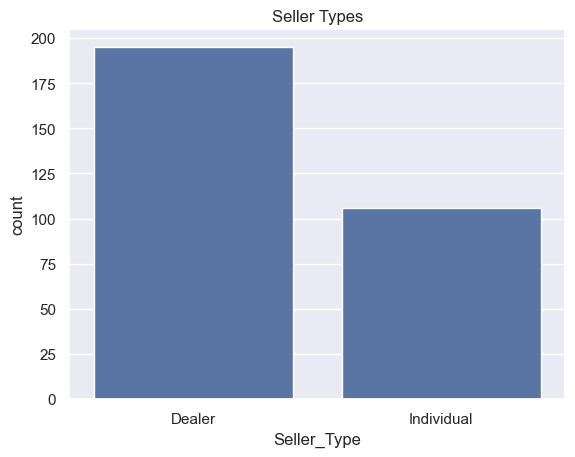

In [8]:
sns.countplot(x='Seller_Type',data=df)
plt.title("Seller Types")

In this graph, the Kms that each car has driven is plotted. It is obvious that we have a wide variety of model cars. Our dataset is small and these diverse set of cars won't be useful for us. So maybe it's better to drop it in the next steps:

C:\Users\Active\AppData\Local\Temp\ipykernel_9576\3558853481.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize='15')


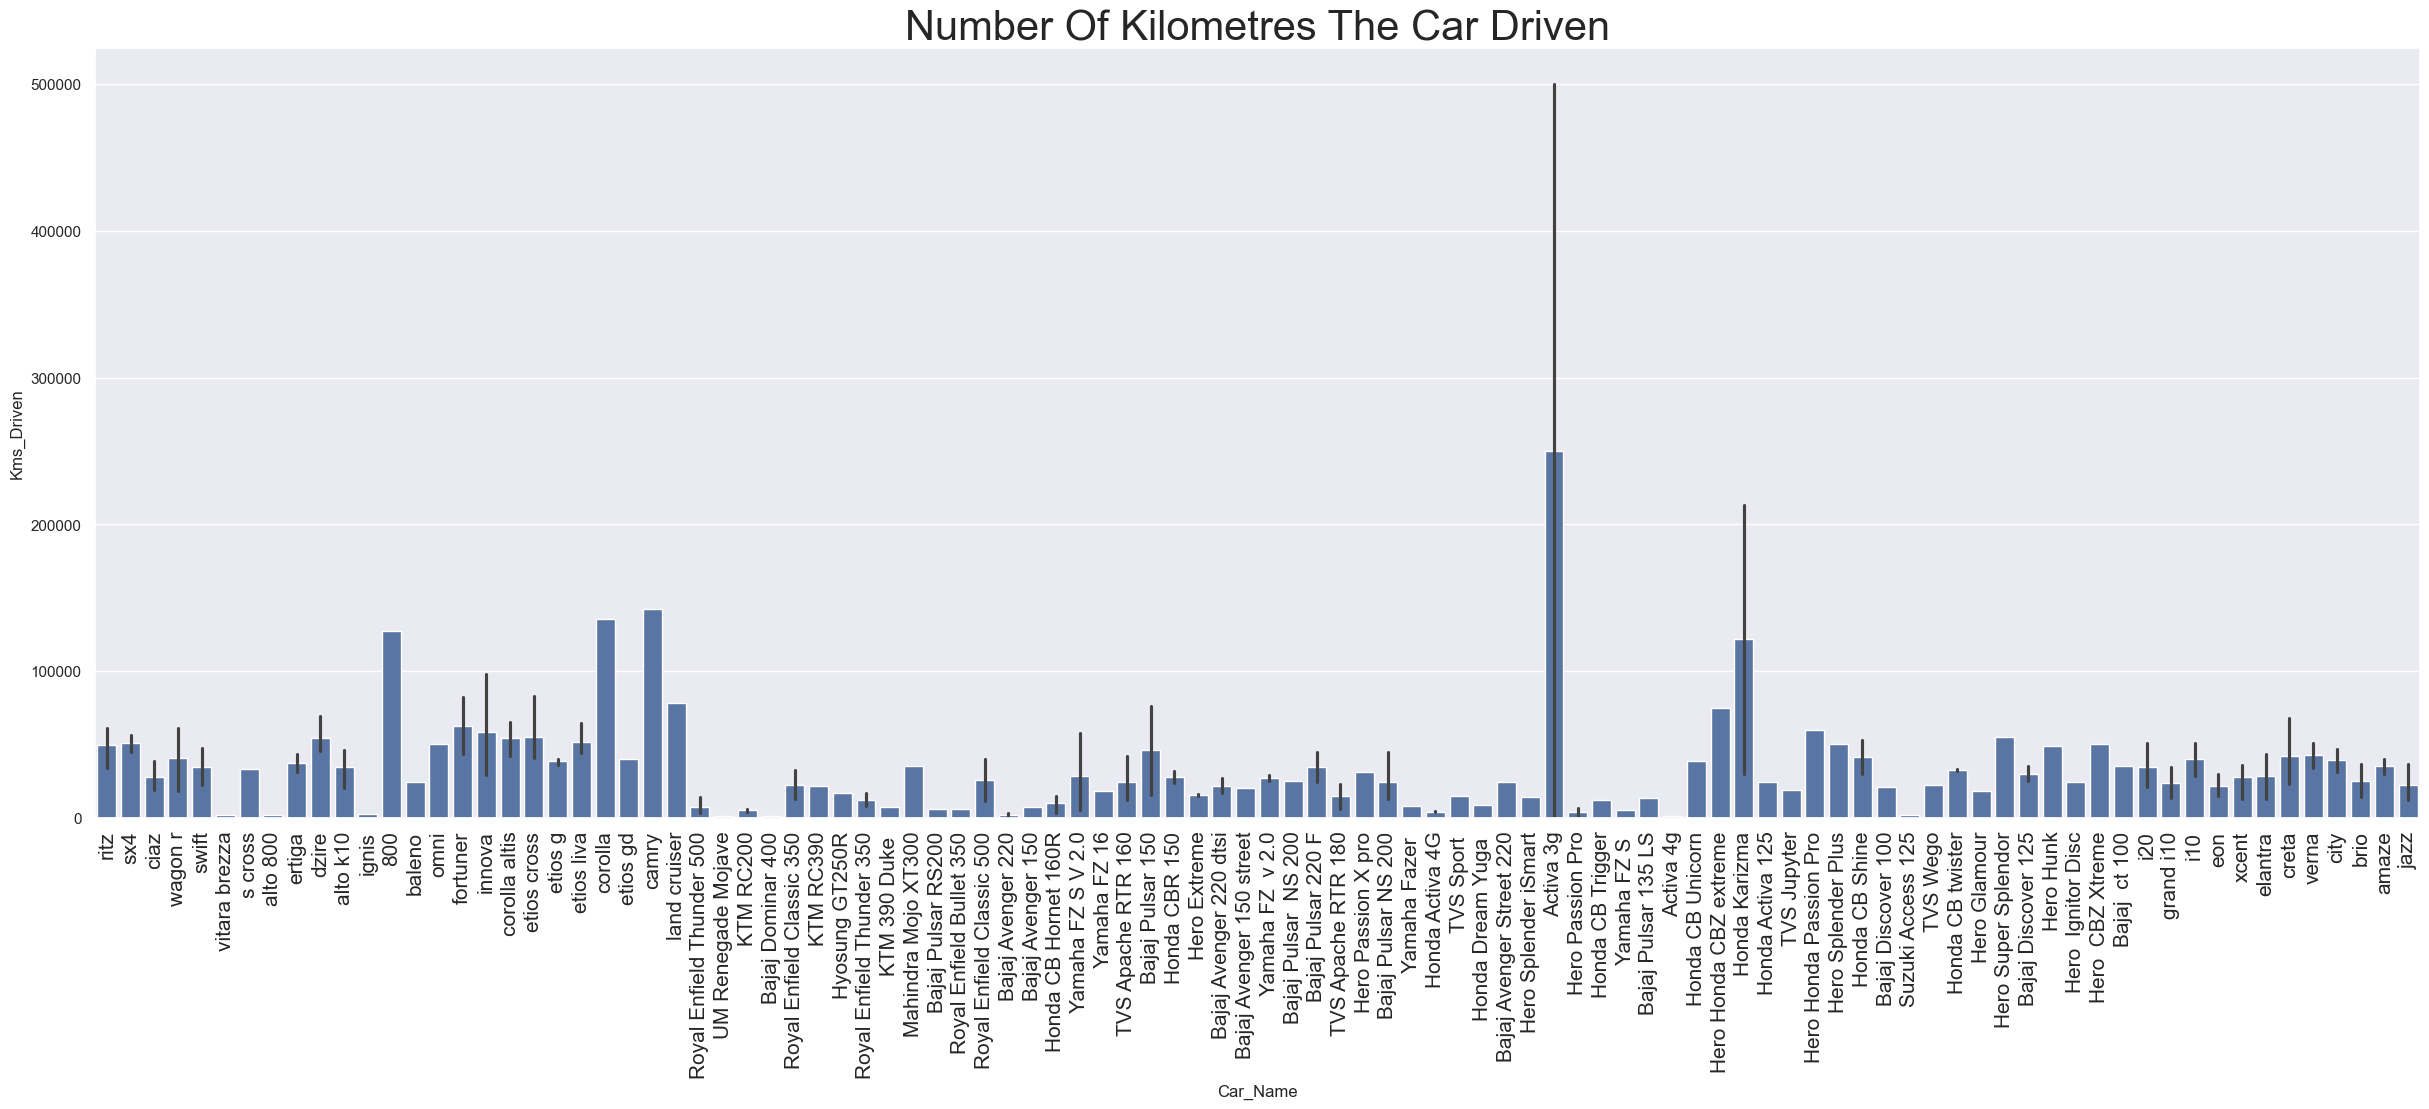

In [9]:
plt.figure(figsize=(30,10))
chart=sns.barplot(x='Car_Name',y='Kms_Driven',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize='15')
plt.title("Number Of Kilometres The Car Driven",
          fontsize='30');

Like Seller_Type, **Fuel_Type** has a limited number of categories and we can apply one-hot encoder on it:

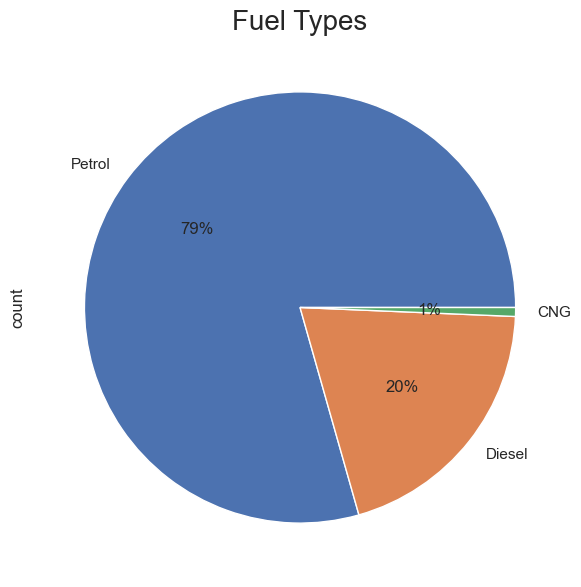

In [10]:
df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.f%%', figsize=(7,7))
plt.title('Fuel Types',fontsize=20)
plt.show()

If we search for linear relation between different features in histogram, the one that is more obvious is relation between **Selling_Price** and **Present_Price**:

d:\Teias\Usage\Term-1\ADS\Assignments\ads-course\env\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


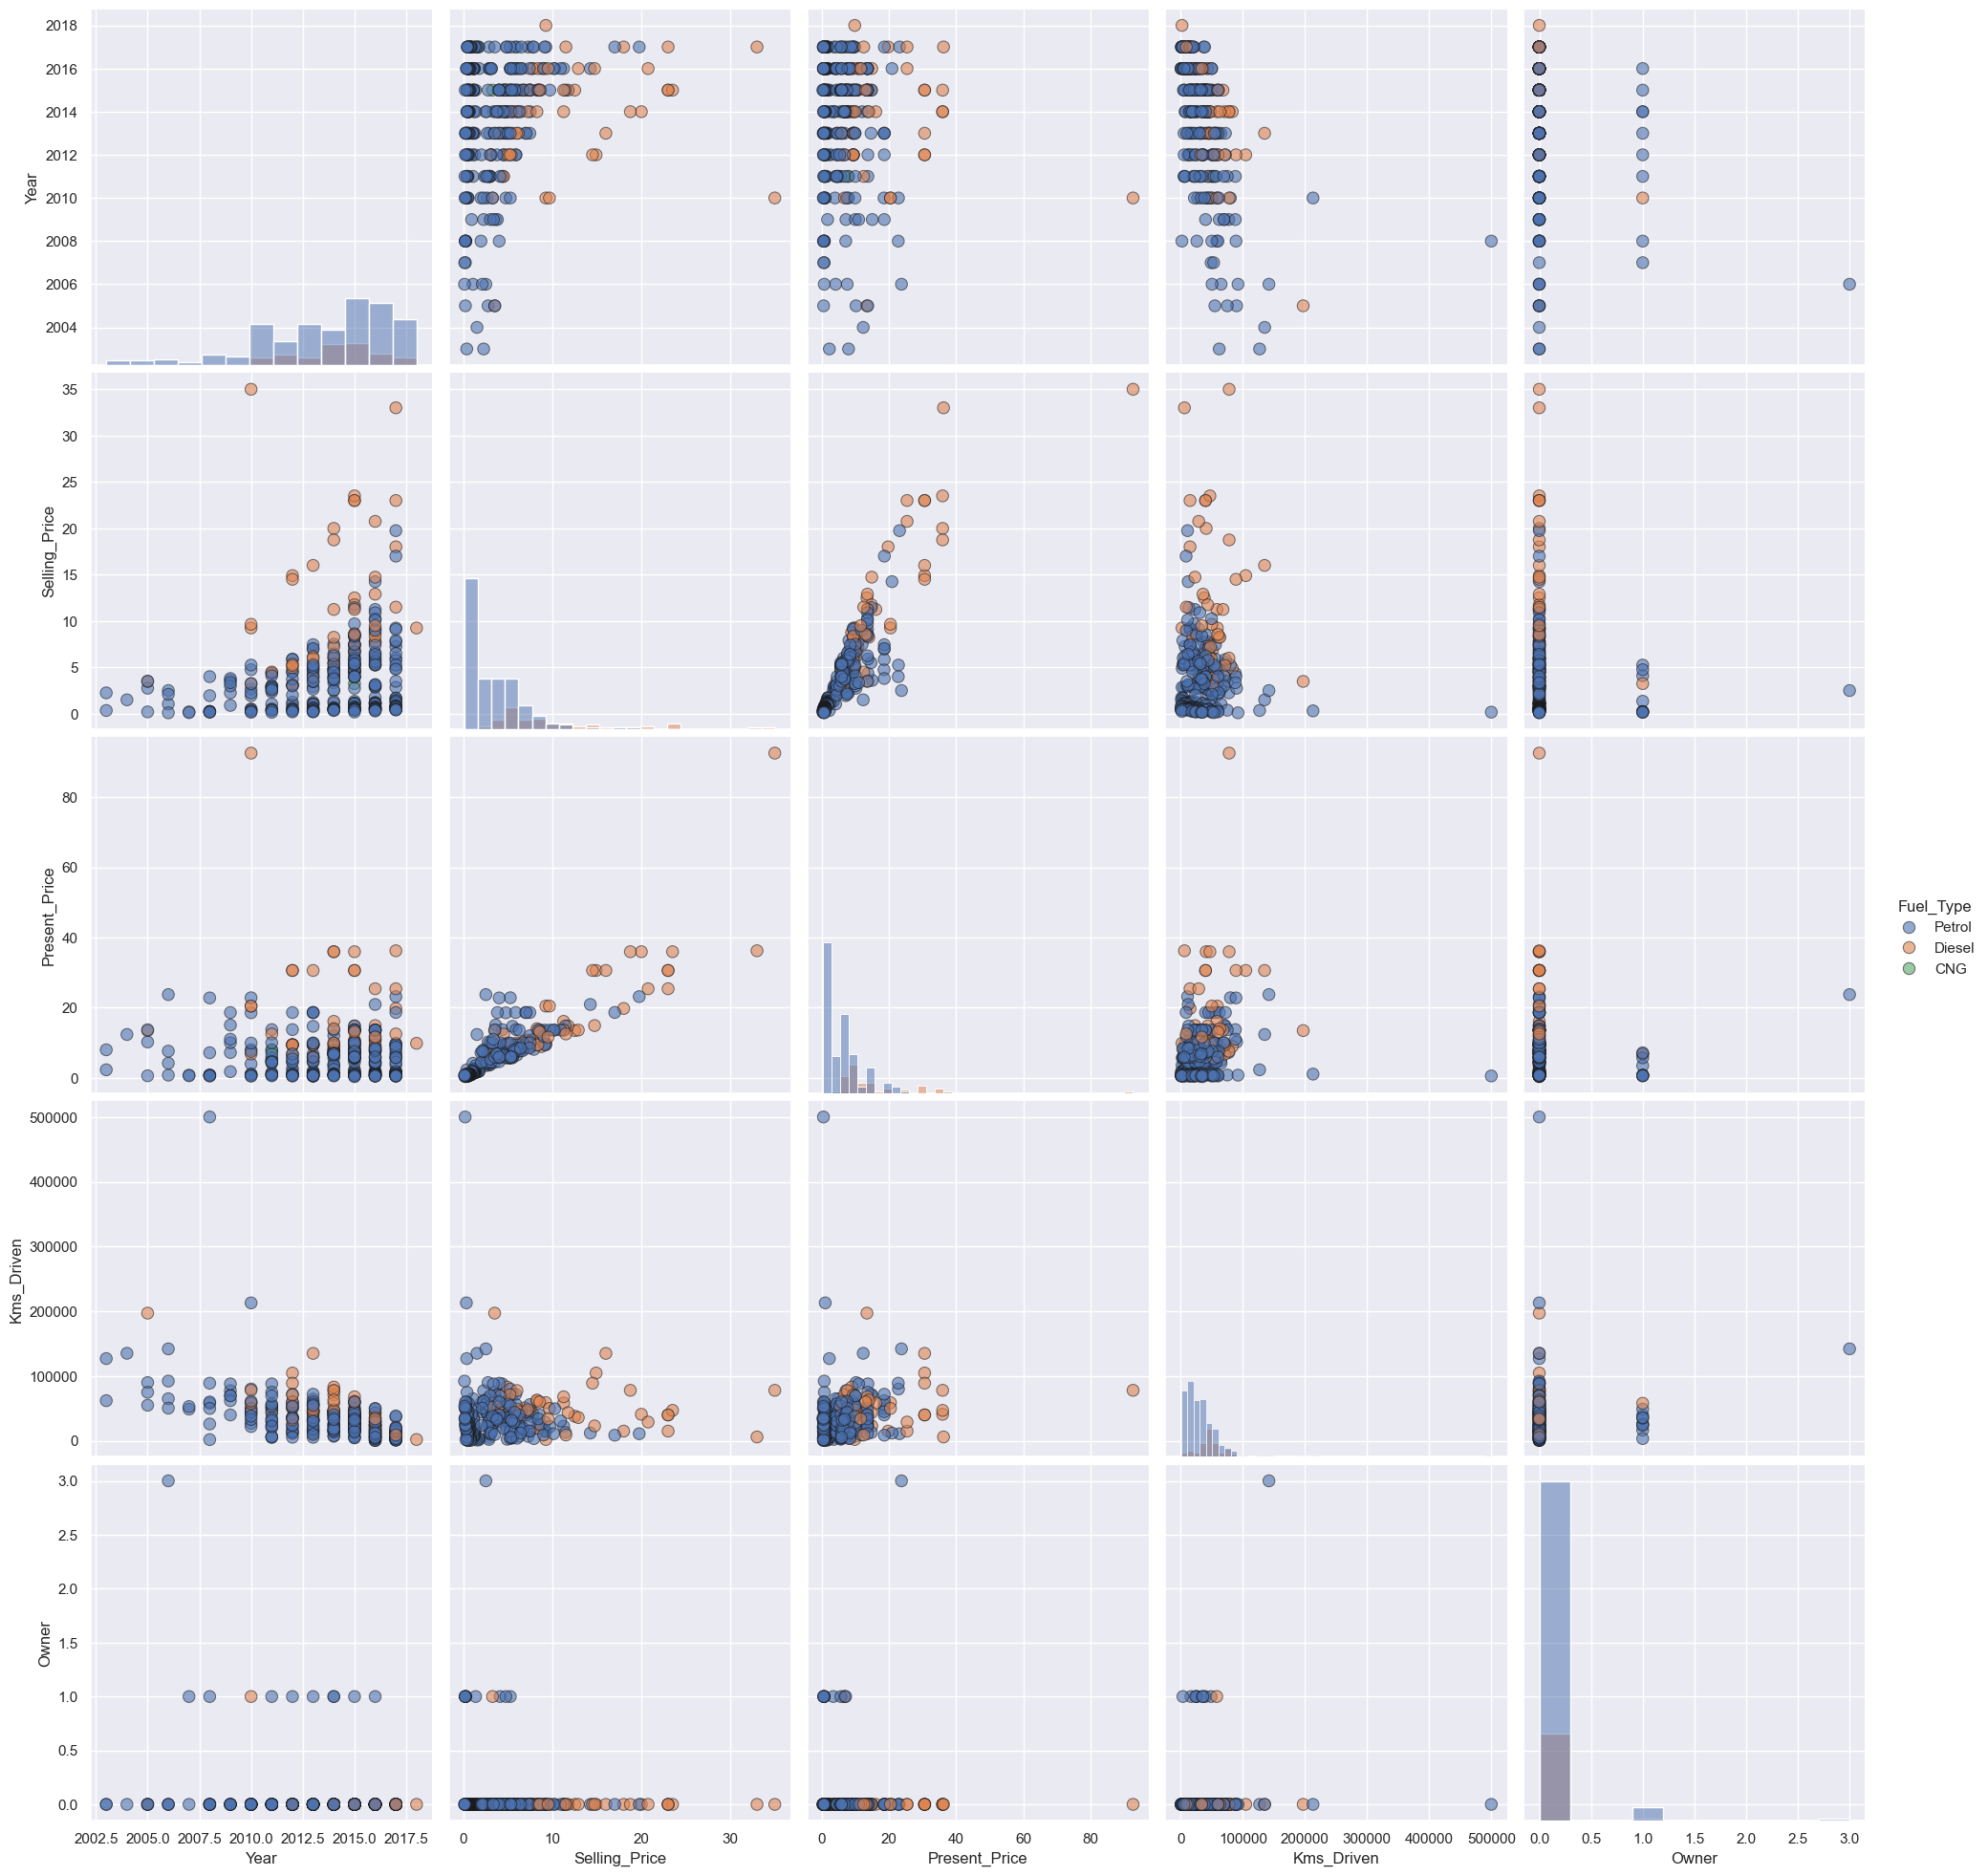

In [11]:
sns.pairplot(df, diag_kind = 'hist',hue='Fuel_Type',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

# Linear Regression

In this section, we will train a linear regression model on our data and evaluate the model on the train and test set. For simple linear regression, we will examine two scenarios: Dataset without any special cleaning and preprocessing and vice versa. For next sections, we will just use cleaned data.

## Original Data

At first, it is better to copy our DataFrame:

In [12]:
df_lin = df.copy()

The only thing we do is converting object types to numerical encoding. We used Categorical Encoding:

In [13]:
for col in df_lin.select_dtypes("object"):
    df_lin[col] = df_lin[col].factorize()[0]

Now we prepare the dataset for training!

In [14]:
X = df_lin.drop('Selling_Price', axis=1)
Y = df_lin['Selling_Price']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In this step, we will train our linear regression model!

In [15]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
Y_pred = lin_reg_model.predict(X_test)
Y_pred_actual = lin_reg_model.predict(X_train)

In the following DataFrame, We have actual amount of test dataset with their predicted amount and the difference between them:

In [17]:
df_pred = pd.DataFrame({'Actual Amount':Y_test, 'Predicted Amount':Y_pred, 'Difference': Y_test - Y_pred})
df_pred.head()

,Actual Amount,Predicted Amount,Difference
285,7.40,8.086419,-0.686419
248,4.00,3.096396,0.903604
150,0.50,-0.585454,1.085454
217,3.15,4.344707,-1.194707
107,1.25,0.412907,0.837093


After training phase, it's time to evaluate our model. The metrics that we calculate are RMSE, MAE and R2-Score but our main focus is on R2-Score:

In [18]:
RMSE_train = mean_squared_error(Y_train,Y_pred_actual)
RMSE_test = mean_squared_error(Y_test,Y_pred)

print('RMSE on the train set is %.2f: ' %RMSE_train)
print('RMSE on the test set is %.2f: '%RMSE_test)

RMSE on the train set is 3.19: 
RMSE on the test set is 3.14: 


In [19]:
MAE_train = mean_absolute_error(Y_train,Y_pred_actual)
MAE_test = mean_absolute_error(Y_test,Y_pred)

print('MAE on the train set is %.2f' %MAE_train)
print('MAE on the test set is %.2f' %MAE_test)

MAE on the train set is 1.20
MAE on the test set is 1.13


The most important metric for us is R2-Score and the best value for it is 1.0. R2-Score is 0.88 on the train set and 0.85 an the test set that indicate the quality of our model. In the next part, we will apply cleaning and preprocessing techniques and compute this metric in that scenario:

In [20]:
r2_train = r2_score(Y_train,Y_pred_actual)
r2_test = r2_score(Y_test,Y_pred)

print("R2 Score (Train): %.3f" %r2_train)
print("R2 Score (Test): %.3f" %r2_test)

R2 Score (Train): 0.881
R2 Score (Test): 0.855


The coefficient of each feature in linear regression model will teach us about the importance of them. In this plot, the coefficient of each column has shown. Fuel_Type and Transmission are the features with largest positive coefficients and Seller_Type is the one with largest negative coefficient:

In [21]:
weights_linear = lin_reg_model.coef_

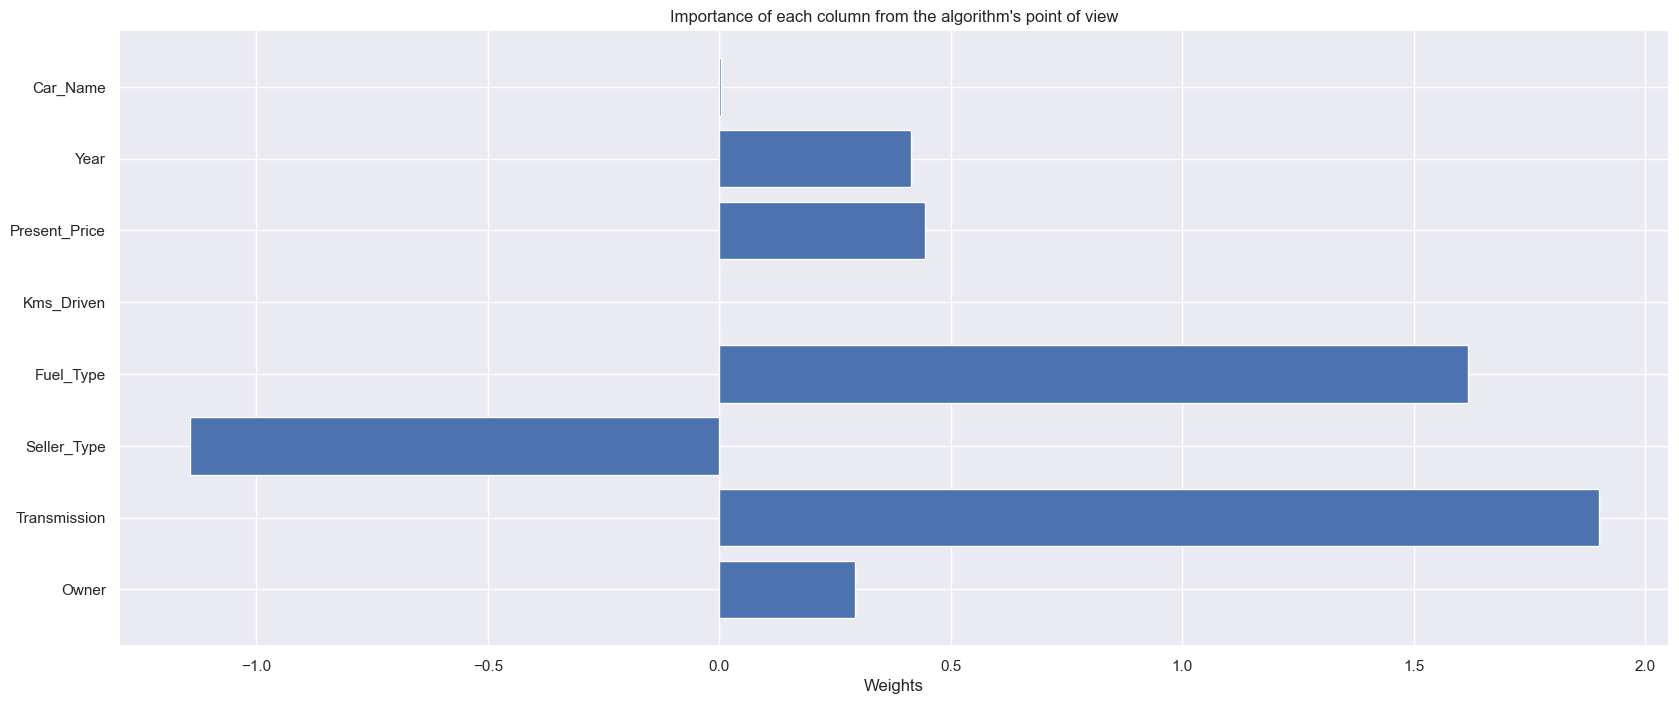

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
y_pos = np.arange(0,len(weights_linear),1)
labels = list(X.columns)

hbars = ax.barh(y_pos, weights_linear, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Weights')
ax.set_title("Importance of each column from the algorithm's point of view")

plt.show()

# Data Cleaning and Pre-Processing

Now we will clean and pre-process the data and observe its impact on the results.

Firstly it is necessary to take a copy from our data:

In [23]:
df_lin_proc = df.copy()

Car_Name has a diverse set of values according to the volume of the dataset. Due to this problem, it will be droped from dataset:

In [24]:
df_lin_proc.drop(columns = "Car_Name", inplace=True)

Age is more useful than having the Year of production and if we have Year, we should derive Age from it. In conclusion, the Year column will be droped and The Age column will be replaced:

In [25]:
df_lin_proc['Age'] = df_lin_proc['Year'].apply(lambda x: 2023 - x)
df_lin_proc.drop(columns = "Year", inplace = True)

In the previous parts, we saw that Fuel_Type and Seller_Type have limited categories. 'Transmission' is just like them so we can apply one-hot encoding on them:

In [26]:
df_lin_proc['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [27]:
df_lin_proc = pd.get_dummies(df_lin_proc, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True)

In [28]:
df_lin_proc.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


Now it's time for training and evaluating the model!

In [29]:
X = df_lin_proc.drop('Selling_Price', axis=1)
Y = df_lin_proc['Selling_Price']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
lin_reg_model_v2 = LinearRegression()
lin_reg_model_v2.fit(X_train_scaled,Y_train)

LinearRegression()

In [32]:
Y_pred = lin_reg_model_v2.predict(X_test_scaled)  # Test
Y_pred_actual = lin_reg_model_v2.predict(X_train_scaled) # Train

Time to evaluation! RMSE has decreased slightly from the last model but MAE has seen slight increases:

In [33]:
RMSE_train = mean_squared_error(Y_train,Y_pred_actual)
RMSE_test = mean_squared_error(Y_test,Y_pred)

print('RMSE on the train set is %.2f: ' %RMSE_train)
print('RMSE on the test set is %.2f: '%RMSE_test)

RMSE on the train set is 3.15: 
RMSE on the test set is 3.00: 


In [34]:
MAE_train = mean_absolute_error(Y_train,Y_pred_actual)
MAE_test = mean_absolute_error(Y_test,Y_pred)

print('MAE on the train set is %.2f' %MAE_train)
print('MAE on the test set is %.2f' %MAE_test)

MAE on the train set is 1.21
MAE on the test set is 1.15


R2-score has improved from last time on the test set from 0.85 to 0.86. It indicates that data preprocessing will give us stronger results:

In [35]:
r2_train = r2_score(Y_train,Y_pred_actual)
r2_test = r2_score(Y_test,Y_pred)

print("R2 Score (Train): %.3f" %r2_train)
print("R2 Score (Test): %.3f" %r2_test)

R2 Score (Train): 0.882
R2 Score (Test): 0.862


The coefficients has changed now! The largest positive coefficient is for Present_Price and Age has the largest negative coefficient:

In [36]:
weights_linear = lin_reg_model_v2.coef_

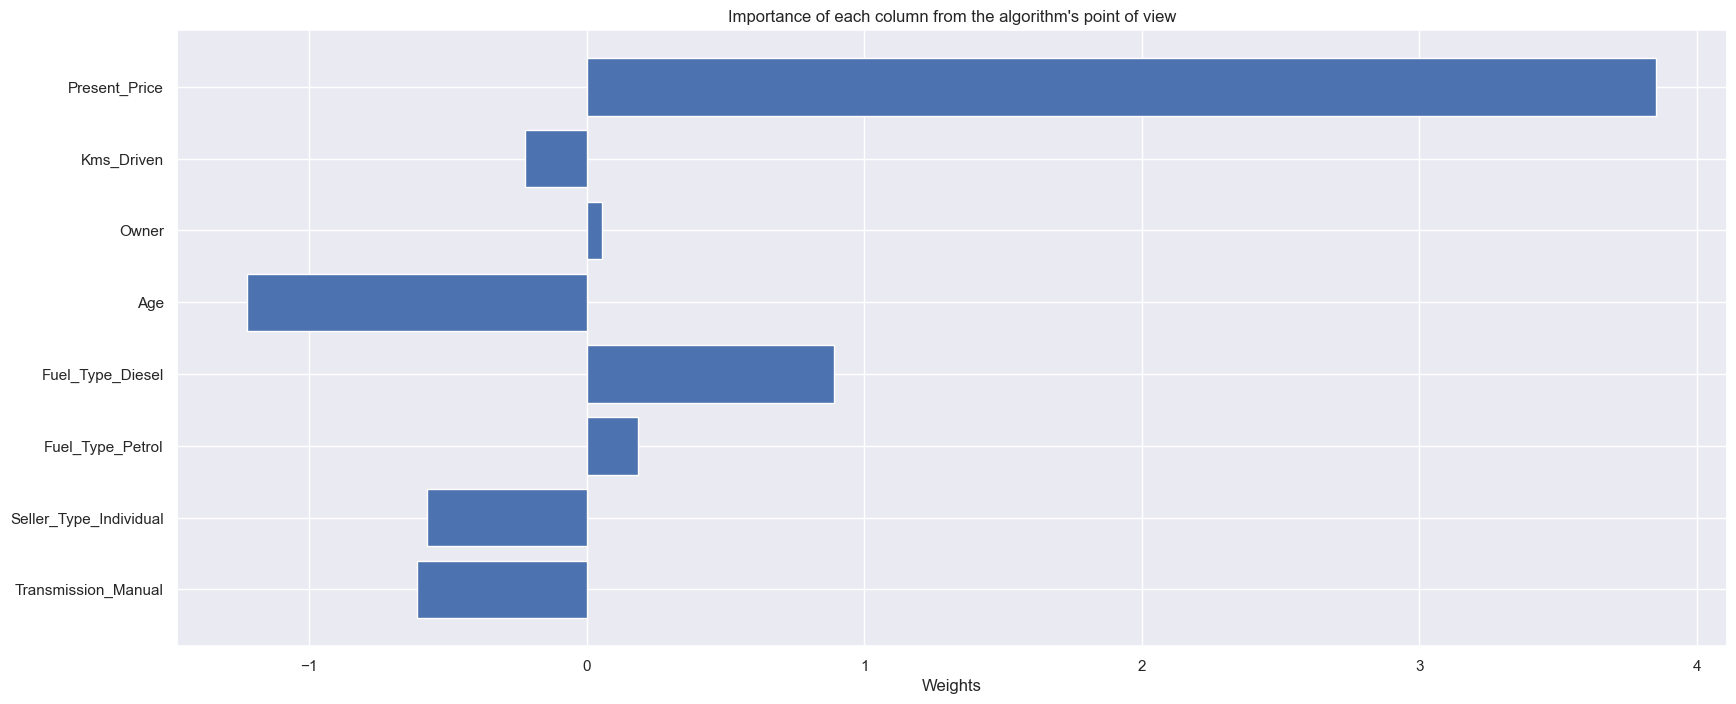

In [37]:
fig, ax = plt.subplots(figsize=(20,8))
y_pos = np.arange(0,len(weights_linear),1)
labels = list(X.columns)

hbars = ax.barh(y_pos, weights_linear, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Weights')
ax.set_title("Importance of each column from the algorithm's point of view")

plt.show()

# Kernel Regression

We don't have an obvious linear relation in all cases. A suitable kernel maps data points X to another space where their relation with traget variable y becomes nearly linear. Kernel ridge regression combines ridge regression with the kernel trick.

In this example, we use RBF as kernel. Here is its formula:

$K(X_i, X_j) = \exp(-\gamma ||X_i - X_j||^2)$

In [38]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='rbf')
model.fit(X_train_scaled, Y_train)

KernelRidge(kernel='rbf')

In [39]:
Y_pred = model.predict(X_test_scaled)  # Test
Y_pred_actual = model.predict(X_train_scaled) # Train

Now we evaluate our model using R2-Score. We have a considerable improvement in R2-score of test. Our best R2-score was  0.86 but now we have 0.93! It seems that the kernel has found useful features to predict price:

In [40]:
r2_train = r2_score(Y_train,Y_pred_actual)
r2_test = r2_score(Y_test,Y_pred)

print("R2 Score (Train): %.3f" %r2_train)
print("R2 Score (Test): %.3f" %r2_test)

R2 Score (Train): 0.889
R2 Score (Test): 0.933


# Logistic Regression

logistic regression is useful when the the values of the target variable is limited within a range. In Addition, the predicted values should be in integer format. Hypothesis function for logistic regression is sigmoid function:

$f(X_i, w) = \frac{1}{1 + e^{-X_i.w}}$

**Selling_Price** is our target column and the data for this feature has the floating point format. Because we aim to use this for logistic regression too and it does not accept floating point numbers, we multiply each record in 100 and convert it to INT:

In [41]:
Y_train_log = Y_train.apply(lambda x: int(x * 100))
Y_test_log = Y_test.apply(lambda x: int(x * 100))

We don't consider any penalty function for our model and we set max_iter to 80, indicates the maximum number of iterations taken for the solver to converge (The purpose of it is avoiding from overfitting):

In [42]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty='none', max_iter=80)
model_lr.fit(X_train_scaled, Y_train_log)

d:\Teias\Usage\Term-1\ADS\Assignments\ads-course\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Teias\Usage\Term-1\ADS\Assignments\ads-course\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=80, penalty='none')

In [43]:
Y_pred = model_lr.predict(X_test_scaled)  # Test
Y_pred_actual = model_lr.predict(X_train_scaled) # Train

We calculate Mean Absolute Percentage Error (MAPE) for our model. The MAPE also known as mean absolute percentage deviation, is a measure of prediction accuracy of a forecasting method in statistics.

$\begin{equation}
\text{MAPE} = \frac{1}{N} \sum_{i=0}^{N-1} \frac{|y_i - \hat{y}_i|}{|y_i|}
\end{equation}$



In [44]:
MAPE_train = mean_absolute_percentage_error(Y_train_log, Y_pred_actual)
MAPE_test = mean_absolute_percentage_error(Y_test_log, Y_pred)

print("MAPE (Train): %.3f" %MAPE_train)
print("MAPE (Test): %.3f" %MAPE_test)

MAPE (Train): 0.120
MAPE (Test): 0.397


We have acceptable results according to R2-Score. Although it's not better than kernel regression results but now we have 0.91 score on the test set:

In [45]:
r2_train = r2_score(Y_train_log, Y_pred_actual)
r2_test = r2_score(Y_test_log, Y_pred)

print("R2 Score (Train): %.3f" %r2_train)
print("R2 Score (Test): %.3f" %r2_test)

R2 Score (Train): 0.988
R2 Score (Test): 0.913


# Ridge Regression

Ridge regression is a linear regression method that is used to reduce the overfitting of a model. It does this by adding a penalty term to the cost function that penalizes large values of the weights. The ridge regression penalty parameter λ controls the strength of the penalty term. A larger value of λ will result in a smaller value of the weights.

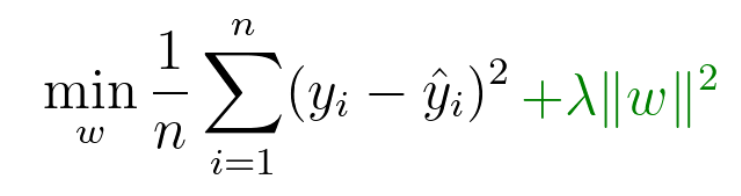

In [46]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, Y_train)

Ridge(alpha=0.1)

In [47]:
Y_pred = model_ridge.predict(X_test_scaled)  # Test
Y_pred_actual = model_ridge.predict(X_train_scaled) # Train

Although we don't have any special improvement compared with simple linear regression but we should remember that we will confront overfitting with a lower probablity in here:

In [48]:
r2_train = r2_score(Y_train, Y_pred_actual)
r2_test = r2_score(Y_test, Y_pred)

print("R2 Score (Train): %.3f" %r2_train)
print("R2 Score (Test): %.3f" %r2_test)

R2 Score (Train): 0.882
R2 Score (Test): 0.862


Now we want to look that impact of different alpha values on the results:

In [49]:
alpha_list = [0.0001,.0001,.0005,.001,.005,0.01,.1,0.3,0.5,1]
scores = []
for alpha in alpha_list:
  model = Ridge(alpha=alpha)
  model.fit(X_train_scaled, Y_train)
  y_pred = model.predict(X_test_scaled)
  MAPE_test = mean_absolute_percentage_error(Y_test, y_pred)
  scores.append(MAPE_test)

According to results, It's obvious that regularization in this case does not help us so much and the changes in MAPE are subtle:

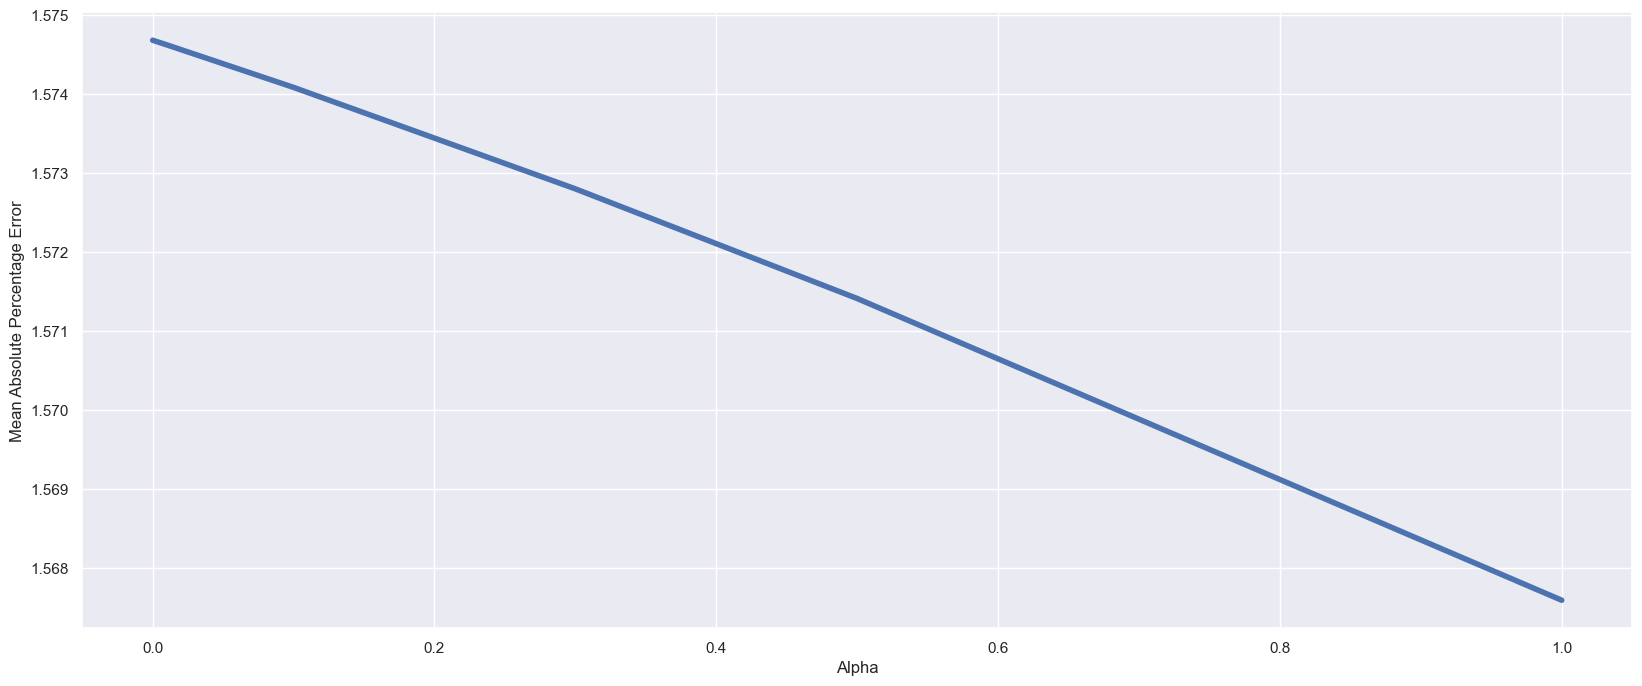

In [50]:
# Plot the results
plt.figure(figsize=(20,8))
plt.plot(alpha_list,scores, lw=4)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()

# LASSO Regression

The Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression method that is used to reduce the overfitting of a model and to perform feature selection. It does this by adding a penalty term to the cost function that penalizes the 1-norm of the weights. The Lasso regression penalty parameter λ controls the strength of the penalty term. A larger value of λ will result in a smaller value of the 1-norm of the weights and will cause more features to be set to zero.
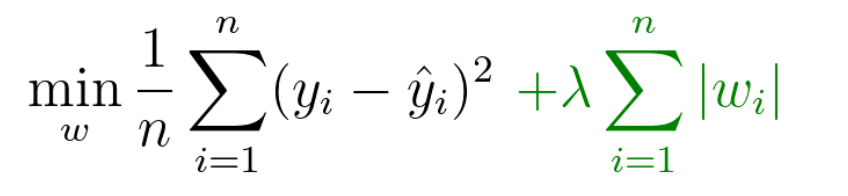

In [51]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_scaled, Y_train)

Lasso(alpha=0.1)

In [52]:
Y_pred = model_lasso.predict(X_test_scaled)  # Test
Y_pred_actual = model_lasso.predict(X_train_scaled) # Train

Same as ridge regression, There is no considerable improvement but the effect of overfitting has reduced:

In [53]:
r2_train = r2_score(Y_train, Y_pred_actual)
r2_test = r2_score(Y_test, Y_pred)

print("R2 Score (Train): %.3f" %r2_train)
print("R2 Score (Test): %.3f" %r2_test)

R2 Score (Train): 0.881
R2 Score (Test): 0.868


In [54]:
alpha_list = [0.0001,.0001,.0005,.001,.005,0.01,.1,0.3,0.5,1]
scores = []
for alpha in alpha_list:
  model = Lasso(alpha=alpha)
  model.fit(X_train_scaled, Y_train)
  y_pred = model.predict(X_test_scaled)
  MAPE_test = mean_absolute_percentage_error(Y_test, y_pred)
  scores.append(MAPE_test)

Like ridge, trying different alpha values has not changed MAPE so much:

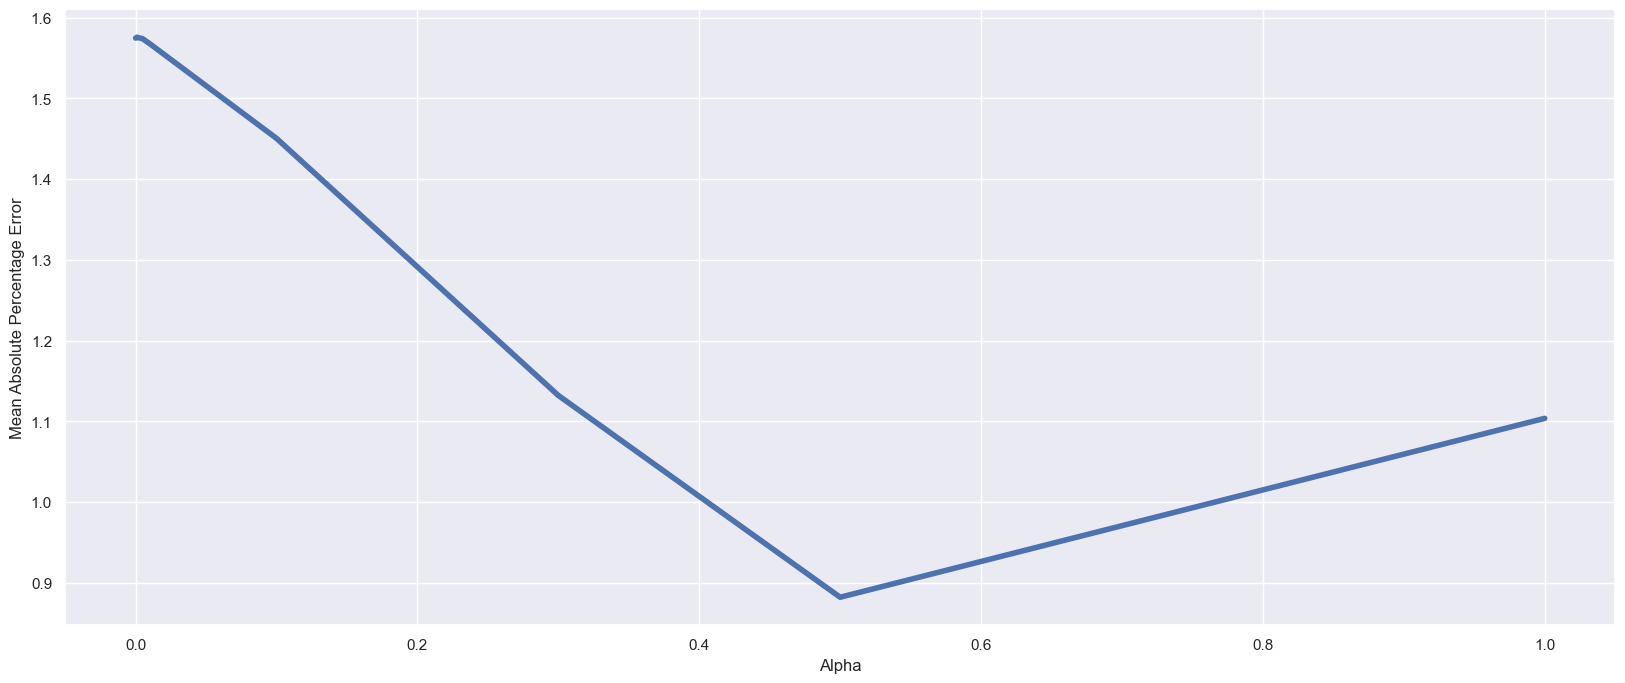

In [55]:
# Plot the results
plt.figure(figsize=(20,8))
plt.plot(alpha_list,scores, lw=4)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()

# **Question:** Explain kernel trick in a few sentences and how it can be helpful in achieving better regression results:

The kernel trick is a technique that allows us to use nonlinear functions in linear models. It does this by mapping the data into a higher-dimensional space, where the nonlinear relationships between the data points can be represented linearly. The kernel function is used to compute the similarity between data points in this higher-dimensional space.

The kernel trick can be helpful in achieving better regression results in several ways. First, it can help to capture nonlinear relationships between the data points, which can lead to more accurate predictions. Second, it can help to reduce the dimensionality of the data, which can make it easier to train a model. Finally, it can help to improve the robustness of a model to outliers and noise.

Here are some of the famous kernel tricks:


*   Linear Kernel
*   Polynomial kernel
*   Radial basis function (RBF) kernel
*   Sigmoid kernel

